# INTERNATIONAL DATASET

Fichajes más caros en la hitoria del fútbol

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
# import kaggle

In [ ]:
# Para descargar los archivos via API es necesario tener un token almacenado en un archivo kaggle.json en el directorio ~/.kaggle/
#
# def descargar_archivo(dataset, ruta_archivo):
#     if not os.path.exists(ruta_archivo):
#         print(f"Descargando archivo: {ruta_archivo}")
#         kaggle.api.dataset_download_files(dataset, path=ruta_archivo, unzip=True)
#         print(f"Archivo descargado en {ruta_archivo}")
#     else:
#         print(f"El archivo ya existe: {ruta_archivo}")
#
# # Configuración de la ruta del archivo
# ruta_fichajes = 'data/football_players.csv'
#
# # Descarga del archivo si no existe
# descargar_archivo('berkayalan/the-most-expensive-football-transfers', ruta_fichajes)

In [4]:
ruta_fichajes = 'data/football_players.csv'
df_fichajes = pd.read_csv(ruta_fichajes,low_memory = False)
df_fichajes.head(5)

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


#### 2.1 Exploración de datos

In [5]:
df_fichajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     object 
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.2+ KB


In [6]:
df_fichajes_filtrado = df_fichajes.copy()
df_fichajes_filtrado

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991
5,6,England,Jack Grealish,England,Aston Villa,England,Manchester City,Midfielder,117.0,£100,2021,1995
6,7,France,Paul Pogba,Italy,Juventus,England,Manchester United,Midfielder,105.0,£89,2016,1993
7,7,France,Ousmane Dembélé,Germany,Borussia Dortmund,Spain,Barcelona,Forward,105.0,£97,2017,1997
8,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,1989
9,10,Portugal,Cristiano Ronaldo,Spain,Real Madrid,Italy,Juventus,Forward,100.0,£88,2018,1985


In [7]:
print(f'En el dataset hay {len(df_fichajes_filtrado)} fichajes.')
print(f'Con un total de {len(pd.unique(df_fichajes_filtrado["Player"]))} jugadores.')

En el dataset hay 54 fichajes.
Con un total de 51 jugadores.


In [8]:
df_fichajes_filtrado

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991
5,6,England,Jack Grealish,England,Aston Villa,England,Manchester City,Midfielder,117.0,£100,2021,1995
6,7,France,Paul Pogba,Italy,Juventus,England,Manchester United,Midfielder,105.0,£89,2016,1993
7,7,France,Ousmane Dembélé,Germany,Borussia Dortmund,Spain,Barcelona,Forward,105.0,£97,2017,1997
8,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,1989
9,10,Portugal,Cristiano Ronaldo,Spain,Real Madrid,Italy,Juventus,Forward,100.0,£88,2018,1985


#### 2.1 Calidad de datos

In [9]:
df_fichajes_filtrado.isnull().sum()

Rank             0
Origin           0
Player           0
From(Country)    0
From(Club)       0
To(Country)      0
To(Club)         0
Position         0
Fee(€ mln)       0
Fee(£ mln)       0
Year             0
Born             0
dtype: int64

In [10]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Valores Faltantes', 1: '% de Valores Totales'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% de Valores Totales', ascending=False).round(1)
    print("El dataframe tiene " + str(df.shape[1]) + " columnas.\n"
                                                     "Hay " + str(mis_val_table_ren_columns.shape[0]) +
          " columnas que les faltan valores.")
    return mis_val_table_ren_columns
missing_values_table(df_fichajes_filtrado)

El dataframe tiene 12 columnas.
Hay 0 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales


In [11]:
missing_df = missing_values_table(df_fichajes_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')
df_fichajes_filtrado = df_fichajes_filtrado.drop(list(missing_columns), axis=1)

El dataframe tiene 12 columnas.
Hay 0 columnas que les faltan valores.
Se eliminan 0 columnas.
Son: []


In [13]:
columnas_eliminar = ['Fee(£ mln)', 'Origin', 'From(Country)', 'To(Country)', 'Position', 'Year', 'Born']
df_fichajes_filtrado = df_fichajes_filtrado.drop(columnas_eliminar, axis=1)
df_fichajes_filtrado

,Rank,Player,From(Club),To(Club),Fee(€ mln)
0,1,Neymar,Barcelona,Paris Saint-Germain,222.0
1,2,Kylian Mbappé,Monaco,Paris Saint-Germain,180.0
2,3,Philippe Coutinho,Liverpool,Barcelona,145.0
3,4,João Félix,Benfica,Atlético Madrid,126.0
4,5,Antoine Griezmann,Atlético Madrid,Barcelona,120.0
5,6,Jack Grealish,Aston Villa,Manchester City,117.0
6,7,Paul Pogba,Juventus,Manchester United,105.0
7,7,Ousmane Dembélé,Borussia Dortmund,Barcelona,105.0
8,9,Gareth Bale,Tottenham Hotspur,Real Madrid,100.0
9,10,Cristiano Ronaldo,Real Madrid,Juventus,100.0


In [14]:
df_fichajes_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        54 non-null     int64  
 1   Player      54 non-null     object 
 2   From(Club)  54 non-null     object 
 3   To(Club)    54 non-null     object 
 4   Fee(€ mln)  54 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ KB


In [16]:
df_fichajes_filtrado = df_fichajes_filtrado.rename(columns={
    'Rank': 'Ranking',
    'Player': 'Jugador',
    'From(Club)': 'Desde (Club)',
    'To(Club)': 'Hasta (Club)',
    'Fee(€ mln)': 'Precio (€ mill)'
})

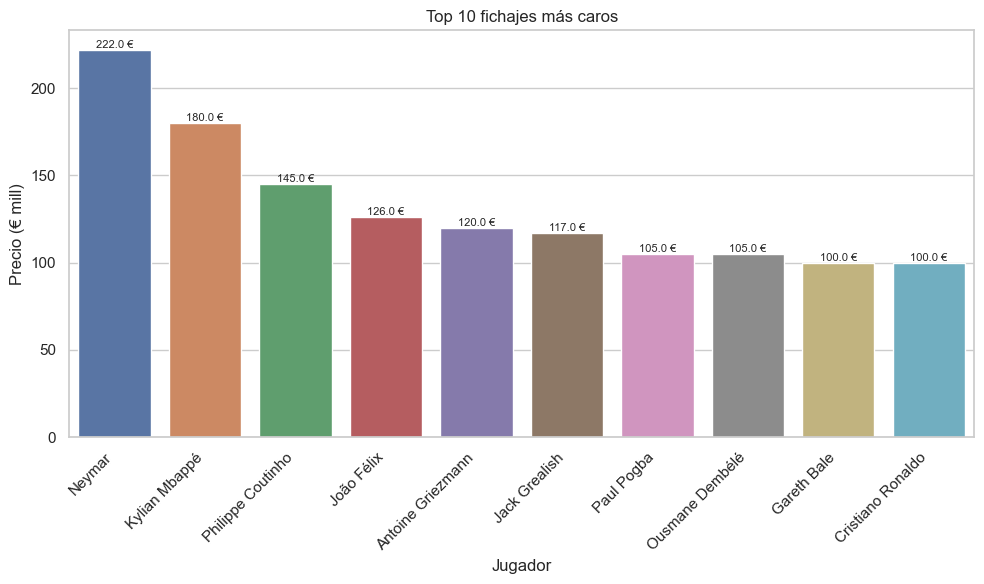

In [17]:
# mostrar 10 fichajes mas caros
df_fichajes_filtrado_sorted = df_fichajes_filtrado.sort_values(by='Precio (€ mill)', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Jugador', y='Precio (€ mill)', data=df_fichajes_filtrado_sorted)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f"{p.get_height()} €", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.title("Top 10 fichajes más caros")
plt.xlabel("Jugador")
plt.ylabel("Precio (€ mill)")
plt.savefig("resources/1.top_10_fichajes_mas_caros.png")
plt.tight_layout()
plt.show()

In [19]:
df_fichajes_filtrado.Jugador.value_counts()

Romelu Lukaku                2
Ángel Di María               2
Cristiano Ronaldo            2
Christian Pulisic            1
Victor Osimhen               1
Thomas Lemar                 1
Sweden Zlatan Ibrahimović    1
Rúben Dias                   1
Riyad Mahrez                 1
Kaká                         1
Álvaro Morata                1
Aymeric Laporte              1
João Cancelo                 1
Edinson Cavani               1
Neymar                       1
Arthur                       1
Pierre-Emerick Aubameyang    1
Raheem Sterling              1
Alisson                      1
Luís Figo                    1
Oscar                        1
Luka Jović                   1
Achraf Hakimi                1
Naby Keïta                   1
Tanguy Ndombele              1
Radamel Falcao               1
Rodri                        1
James Rodríguez              1
Kevin De Bruyne              1
Harry Maguire                1
Philippe Coutinho            1
João Félix                   1
Antoine 

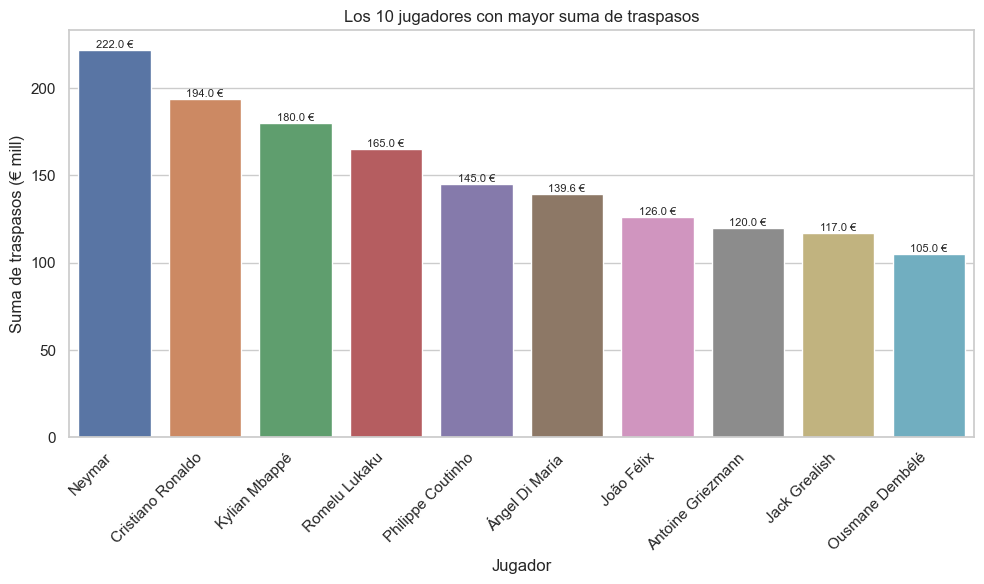

In [25]:
# visualizacion de los 10 jugadores con fichajes mas caros
sns.set_style("whitegrid")
df_suma_traspasos = df_fichajes_filtrado.groupby('Jugador')['Precio (€ mill)'].sum().reset_index()
df_top_jugadores = df_suma_traspasos.nlargest(10, 'Precio (€ mill)')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Jugador', y='Precio (€ mill)', data=df_top_jugadores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(f"{p.get_height()} €", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)
plt.title("Los 10 jugadores con mayor suma de traspasos")
plt.xlabel("Jugador")
plt.ylabel("Suma de traspasos (€ mill)")
plt.savefig("resources/2.grafico_suma_traspasos.png")
plt.tight_layout()
plt.show()

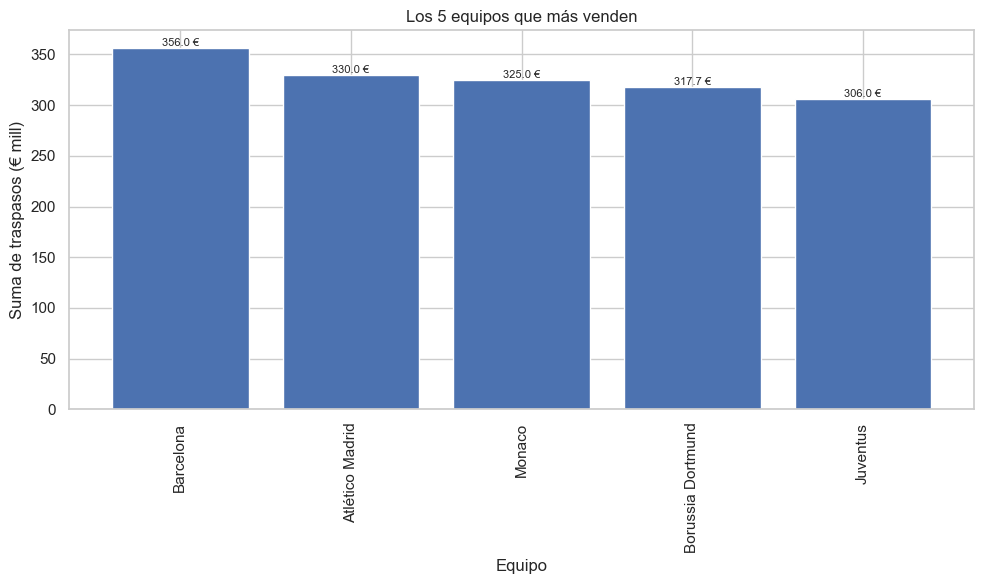

In [29]:
# visualizar los 5 equipos que más venden
df_top_equipos_venden = df_fichajes_filtrado.groupby('Desde (Club)')['Precio (€ mill)'].sum().nlargest(5)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = df_top_equipos_venden.plot(kind='bar', width=0.8)
for p in ax.patches:
    ax.annotate(f"{p.get_height()} €", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)
plt.title("Los 5 equipos que más venden")
plt.xlabel("Equipo")
plt.ylabel("Suma de traspasos (€ mill)")
plt.savefig("resources/3.grafico_equipos_venden.png")
plt.tight_layout()
plt.show()

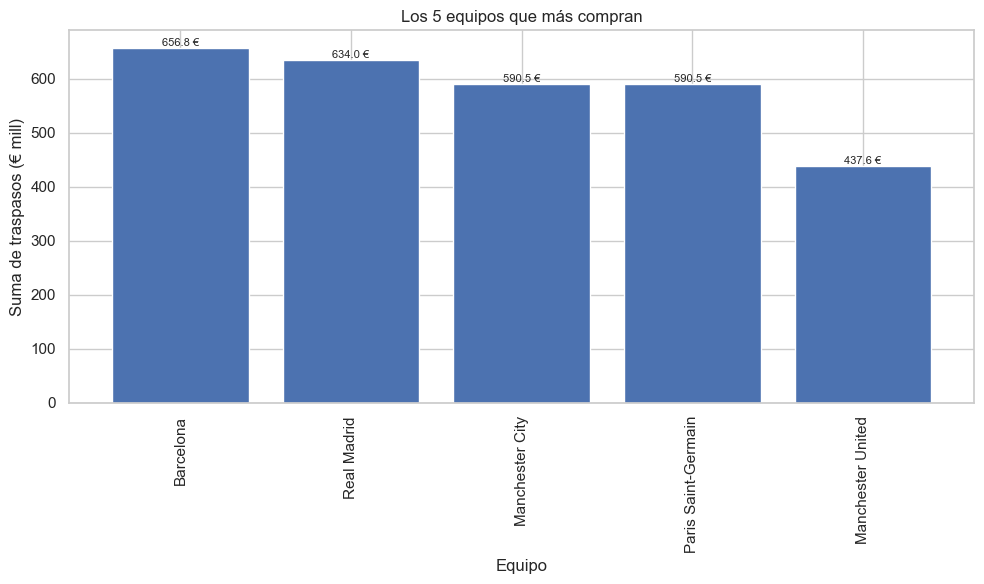

In [30]:
# visualizar los 5 equipos que más compran
df_top_equipos_compran = df_fichajes_filtrado.groupby('Hasta (Club)')['Precio (€ mill)'].sum().nlargest(5)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = df_top_equipos_compran.plot(kind='bar', width=0.8)
for p in ax.patches:
    ax.annotate(f"{p.get_height()} €", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.title("Los 5 equipos que más compran")
plt.xlabel("Equipo")
plt.ylabel("Suma de traspasos (€ mill)")
plt.savefig("resources/4.grafico_equipos_compran.png")
plt.tight_layout()
plt.show()